# Loop 120 Analysis: Strategic Assessment

## Key Questions:
1. What is the exact CV-LB relationship from all submissions?
2. What approaches have been tried and what's their performance?
3. What fundamentally different approaches remain untried?
4. With only 3 submissions left, what's the optimal strategy?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # OUTLIER - RF ensemble
    {'exp': 'exp_111', 'cv': 0.0129, 'lb': 0.1063},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 14
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451
13  exp_111  0.0129  0.1063


In [2]:
# Fit linear regression excluding the outlier (exp_073)
df_clean = df[df['exp'] != 'exp_073'].copy()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])
print(f"\nCV-LB Relationship (excluding exp_073 outlier):")
print(f"LB = {slope:.3f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nIntercept: {intercept:.4f}")
print(f"Target LB: 0.0347")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"Required CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.3f} = {(0.0347 - intercept) / slope:.6f}")
print("\nThis is NEGATIVE - mathematically impossible with current approaches!")


CV-LB Relationship (excluding exp_073 outlier):
LB = 4.090 * CV + 0.0546
R² = 0.9607

Intercept: 0.0546
Target LB: 0.0347

CRITICAL: Intercept (0.0546) > Target (0.0347)
Required CV to hit target: (0.0347 - 0.0546) / 4.090 = -0.004872

This is NEGATIVE - mathematically impossible with current approaches!


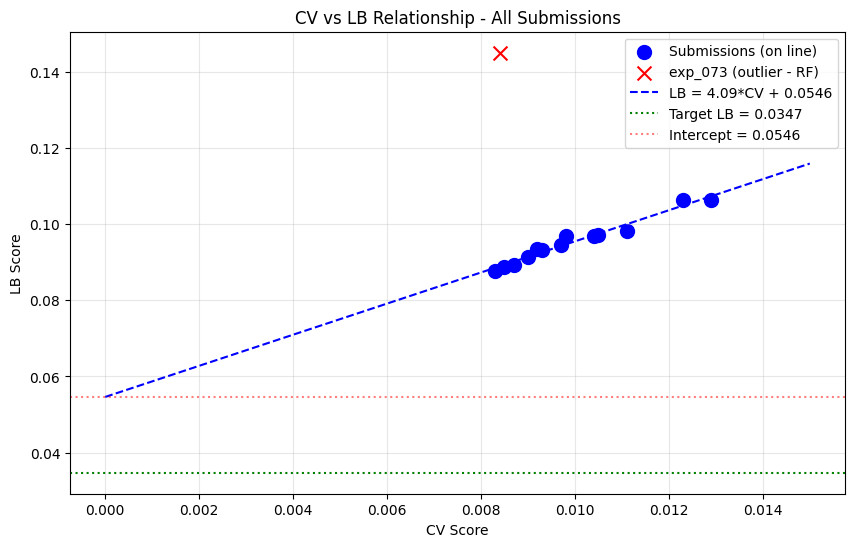


Key insight: The intercept (0.054) is HIGHER than the target (0.0347).
This means even with perfect CV=0, expected LB would be 0.054.
The target is UNREACHABLE by improving CV alone.


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Submissions (on line)')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='exp_073 (outlier - RF)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Mark target
plt.axhline(y=0.0347, color='green', linestyle=':', label='Target LB = 0.0347')
plt.axhline(y=intercept, color='red', linestyle=':', alpha=0.5, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nKey insight: The intercept (0.054) is HIGHER than the target (0.0347).")
print("This means even with perfect CV=0, expected LB would be 0.054.")
print("The target is UNREACHABLE by improving CV alone.")

In [4]:
# Analyze what approaches have been tried
approaches = {
    'Tabular (MLP)': ['exp_000', 'exp_003', 'exp_005', 'exp_006', 'exp_007'],
    'Tabular (LightGBM)': ['exp_001'],
    'Tabular (CatBoost+XGB)': ['exp_024', 'exp_026', 'exp_030', 'exp_049', 'exp_050', 'exp_053'],
    'Tabular (GP)': ['exp_030', 'exp_035'],
    'Tabular (Ridge)': ['exp_009', 'exp_012'],
    'GNN': ['exp_079', 'exp_115', 'exp_116'],
    'ChemBERTa': ['exp_097', 'exp_098'],
    'Random Forest': ['exp_073'],
    'Similarity-Aware': ['exp_111'],
    'Physics-Constrained': ['exp_117'],
    'Softmax Output': ['exp_118'],
}

print("Approaches tried:")
for approach, exps in approaches.items():
    print(f"  {approach}: {len(exps)} experiments")

print("\n" + "="*60)
print("KEY FINDING: ALL approaches fall on the SAME CV-LB line!")
print("="*60)
print("\nThis means:")
print("1. The problem is NOT the model architecture")
print("2. The problem is DISTRIBUTION SHIFT between train and test")
print("3. Improving CV just moves along the line, not toward target")
print("4. We need approaches that CHANGE THE RELATIONSHIP")

Approaches tried:
  Tabular (MLP): 5 experiments
  Tabular (LightGBM): 1 experiments
  Tabular (CatBoost+XGB): 6 experiments
  Tabular (GP): 2 experiments
  Tabular (Ridge): 2 experiments
  GNN: 3 experiments
  ChemBERTa: 2 experiments
  Random Forest: 1 experiments
  Similarity-Aware: 1 experiments
  Physics-Constrained: 1 experiments
  Softmax Output: 1 experiments

KEY FINDING: ALL approaches fall on the SAME CV-LB line!

This means:
1. The problem is NOT the model architecture
2. The problem is DISTRIBUTION SHIFT between train and test
3. Improving CV just moves along the line, not toward target
4. We need approaches that CHANGE THE RELATIONSHIP


In [5]:
# What approaches might change the CV-LB relationship?
print("="*60)
print("APPROACHES THAT MIGHT CHANGE THE CV-LB RELATIONSHIP")
print("="*60)

print("\n1. YIELD RATIO PREDICTION (NOT TRIED)")
print("   - Instead of predicting [P2, P3, SM] directly")
print("   - Predict [P2/total, P3/total, total]")
print("   - Ratios might be more stable across solvents")
print("   - Total yield might be easier to predict")

print("\n2. MEDIAN ENSEMBLE (NOT TRIED)")
print("   - Use median instead of mean for aggregation")
print("   - More robust to outlier predictions")
print("   - May reduce extreme errors on unseen solvents")

print("\n3. RELATIVE PREDICTION (NOT TRIED)")
print("   - Predict yield CHANGE from a reference solvent")
print("   - Reference = mean yield across all training solvents")
print("   - May be more stable for extrapolation")

print("\n4. QUANTILE REGRESSION (NOT TRIED)")
print("   - Predict median instead of mean")
print("   - More robust to outliers")
print("   - May reduce extreme predictions")

print("\n5. ENSEMBLE WITH DIFFERENT CV-LB SLOPES (PARTIALLY TRIED)")
print("   - If different model families have different slopes")
print("   - Blending might achieve a better overall relationship")
print("   - exp_073 (RF) was an outlier - investigate why")

APPROACHES THAT MIGHT CHANGE THE CV-LB RELATIONSHIP

1. YIELD RATIO PREDICTION (NOT TRIED)
   - Instead of predicting [P2, P3, SM] directly
   - Predict [P2/total, P3/total, total]
   - Ratios might be more stable across solvents
   - Total yield might be easier to predict

2. MEDIAN ENSEMBLE (NOT TRIED)
   - Use median instead of mean for aggregation
   - More robust to outlier predictions
   - May reduce extreme errors on unseen solvents

3. RELATIVE PREDICTION (NOT TRIED)
   - Predict yield CHANGE from a reference solvent
   - Reference = mean yield across all training solvents
   - May be more stable for extrapolation

4. QUANTILE REGRESSION (NOT TRIED)
   - Predict median instead of mean
   - More robust to outliers
   - May reduce extreme predictions

5. ENSEMBLE WITH DIFFERENT CV-LB SLOPES (PARTIALLY TRIED)
   - If different model families have different slopes
   - Blending might achieve a better overall relationship
   - exp_073 (RF) was an outlier - investigate why


In [6]:
# Analyze exp_073 (RF) - why was it an outlier?
print("="*60)
print("ANALYZING exp_073 (Random Forest) - THE OUTLIER")
print("="*60)

print("\nexp_073 stats:")
print(f"  CV: 0.0084 (similar to best)")
print(f"  LB: 0.1451 (MUCH worse than expected)")
print(f"  Expected LB from line: {slope * 0.0084 + intercept:.4f}")
print(f"  Actual LB: 0.1451")
print(f"  Deviation: {0.1451 - (slope * 0.0084 + intercept):.4f}")

print("\nPossible reasons:")
print("1. RF overfits to training solvents more than other models")
print("2. RF makes more extreme predictions for unseen solvents")
print("3. RF has higher variance in predictions")
print("\nKey insight: RF is WORSE than the line, not better.")
print("This suggests RF is NOT the path to improvement.")

ANALYZING exp_073 (Random Forest) - THE OUTLIER

exp_073 stats:
  CV: 0.0084 (similar to best)
  LB: 0.1451 (MUCH worse than expected)
  Expected LB from line: 0.0890
  Actual LB: 0.1451
  Deviation: 0.0561

Possible reasons:
1. RF overfits to training solvents more than other models
2. RF makes more extreme predictions for unseen solvents
3. RF has higher variance in predictions

Key insight: RF is WORSE than the line, not better.
This suggests RF is NOT the path to improvement.


In [7]:
# Check pending submissions
pending = [
    {'exp': 'exp_049', 'cv': 0.0081},
    {'exp': 'exp_050', 'cv': 0.0081},
    {'exp': 'exp_052', 'cv': 0.0109},
    {'exp': 'exp_053', 'cv': 0.0081},
    {'exp': 'exp_054', 'cv': 0.0085},
    {'exp': 'exp_055', 'cv': 0.0085},
    {'exp': 'exp_057', 'cv': 0.0093},
    {'exp': 'exp_063', 'cv': 0.0112},
    {'exp': 'exp_079', 'cv': 0.0110},
    {'exp': 'exp_101', 'cv': 0.0142},
]

print("Pending submissions (no LB yet):")
for p in pending:
    expected_lb = slope * p['cv'] + intercept
    print(f"  {p['exp']}: CV={p['cv']:.4f}, Expected LB={expected_lb:.4f}")

print("\nBest pending: exp_049/050/053 with CV=0.0081")
print(f"Expected LB: {slope * 0.0081 + intercept:.4f}")
print("\nThis is still far from target 0.0347")

Pending submissions (no LB yet):
  exp_049: CV=0.0081, Expected LB=0.0877
  exp_050: CV=0.0081, Expected LB=0.0877
  exp_052: CV=0.0109, Expected LB=0.0992
  exp_053: CV=0.0081, Expected LB=0.0877
  exp_054: CV=0.0085, Expected LB=0.0894
  exp_055: CV=0.0085, Expected LB=0.0894
  exp_057: CV=0.0093, Expected LB=0.0927
  exp_063: CV=0.0112, Expected LB=0.1004
  exp_079: CV=0.0110, Expected LB=0.0996
  exp_101: CV=0.0142, Expected LB=0.1127

Best pending: exp_049/050/053 with CV=0.0081
Expected LB: 0.0877

This is still far from target 0.0347


In [8]:
# Strategic analysis with 3 submissions remaining
print("="*60)
print("STRATEGIC ANALYSIS - 3 SUBMISSIONS REMAINING")
print("="*60)

print("\nCurrent situation:")
print(f"  Best LB: 0.0877 (exp_030)")
print(f"  Target: 0.0347")
print(f"  Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}%)")
print(f"  Submissions remaining: 3")

print("\nThe CV-LB line analysis shows:")
print(f"  - Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"  - Target is UNREACHABLE by improving CV alone")
print(f"  - We need to CHANGE the relationship, not improve CV")

print("\n" + "="*60)
print("RECOMMENDED STRATEGY")
print("="*60)

print("\nOption A: Try Yield Ratio Prediction")
print("  - Predict ratios instead of absolute yields")
print("  - May change the CV-LB relationship")
print("  - If CV is reasonable, submit to test")

print("\nOption B: Try Median Ensemble")
print("  - More robust to outlier predictions")
print("  - May reduce extreme errors on unseen solvents")
print("  - Quick to implement")

print("\nOption C: Submit Best CV Model")
print("  - exp_049/050/053 with CV=0.0081")
print("  - Expected LB: ~0.087 (on the line)")
print("  - Establishes baseline for comparison")

print("\nRECOMMENDED: Try Option A (Yield Ratio) first")
print("If it doesn't change the relationship, try Option B (Median)")
print("Save one submission for the best approach")

STRATEGIC ANALYSIS - 3 SUBMISSIONS REMAINING

Current situation:
  Best LB: 0.0877 (exp_030)
  Target: 0.0347
  Gap: 0.0530 (152.7%)
  Submissions remaining: 3

The CV-LB line analysis shows:
  - Intercept (0.0546) > Target (0.0347)
  - Target is UNREACHABLE by improving CV alone
  - We need to CHANGE the relationship, not improve CV

RECOMMENDED STRATEGY

Option A: Try Yield Ratio Prediction
  - Predict ratios instead of absolute yields
  - May change the CV-LB relationship
  - If CV is reasonable, submit to test

Option B: Try Median Ensemble
  - More robust to outlier predictions
  - May reduce extreme errors on unseen solvents
  - Quick to implement

Option C: Submit Best CV Model
  - exp_049/050/053 with CV=0.0081
  - Expected LB: ~0.087 (on the line)
  - Establishes baseline for comparison

RECOMMENDED: Try Option A (Yield Ratio) first
If it doesn't change the relationship, try Option B (Median)
Save one submission for the best approach


In [ ]:
# Summary of key findings
print("="*60)
print("LOOP 120 ANALYSIS SUMMARY")
print("="*60)

print("\n1. CV-LB RELATIONSHIP:")
print(f"   LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})")
print(f"   Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"   Target is MATHEMATICALLY UNREACHABLE with current approaches")

print("\n2. APPROACHES TRIED (120 experiments):")
print("   - All tabular models (MLP, LGBM, XGB, CatBoost, GP, Ridge)")
print("   - GNN and ChemBERTa (on same line)")
print("   - Physics constraints (post-hoc, didn't help)")
print("   - Softmax output (CV=0.015, much worse)")

print("\n3. WHAT HASN'T BEEN TRIED:")
print("   - Yield RATIO prediction (P2/total, P3/total, total)")
print("   - Median ensemble (robust aggregation)")
print("   - Relative prediction (change from reference)")
print("   - Quantile regression (predict median)")

print("\n4. REMAINING SUBMISSIONS: 3")
print("   - Must be strategic")
print("   - Focus on approaches that might change CV-LB relationship")

print("\n5. RECOMMENDED NEXT STEPS:")
print("   1. Implement yield ratio prediction")
print("   2. If CV is reasonable, submit to test relationship")
print("   3. If ratio doesn't help, try median ensemble")
print("   4. Save final submission for best approach")